# **Overview: Movie Recommendation** 

![](https://about.netflix.com/images/meta/netflix-symbol-black.png)

#### In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.…ever wondered how Netflix, Amazon Prime, Showmax, Disney and the likes somehow know what to recommend to you?

#### …it's not just a guess drawn out of the hat. There is an algorithm behind it.


# **Problem Statement**

#### With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

#### What value is achieved through building a functional recommender system?Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.


#### This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

#### For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

<a id="cont"></a>

# **Table of Contents**

<details>
<summary><a href=#one>1. Importing Packages</a></summary>
<br>
<a href=#one.one>1.1 Importing python packages that will be used in the notebook </a>
</details>

<br>

<details>
<summary><a href=#two>2. Loading Data</a></summary>
<br>
<a href=#two.one>2.1 Loading the Train and Test datasets</a>
</details>

<br>

<details>
<summary><a href=#three>3. Exploratory Data Analysis (EDA)</a></summary>
<br>
<a href=#three.one>3.1 Why is EDA important?</a>
<br>
<a href=#three.two>3.2 Pandas profiling model</a>
<br>
<a href=#three.three>3.3 Generating a word cloud</a>
<br>
<a href=#three.four>3.4 Looking at the data types of the Train and Test datasets</a>
<br>
<a href=#three.five>3.5 Looking for null values in the Train and Test datasets</a>
<br>
<a href=#three.six>3.6 Investigating the distribution of categorical values</a>
<br>
<a href=#three.seven> 3.7  Hashtags for each sentiment</a>
</details>

<br>

<details>
<summary><a href=#four>4. Data Engineering</a></summary>
<br>
<a href=#four.one>4.1 A copy of each dataset </a>
<br>
<a href=#four.two>4.2 Function to make all text lowercase </a>
<br>
<a href=#four.three>4.3 Function to remove URLs </a>
<br>
<a href=#four.four>4.4 Removing special characters </a>
<br>
<a href=#four.five>4.5 Removing punctuation </a>
<br>
<a href=#four.six>4.6 Removing digits</a>
<br>
<a href=#four.seven>4.7 Removing stopwords </a>
<br>
<a href=#four.eight>4.8 Tokenization </a>
<br>
<a href=#four.nine>4.9 Lemmatization </a>
<br>
<a href=#four.ten>4.10 Datasets after cleaning </a>
<br>
<a href=#four.eleven>4.11 Analysis of data after cleaning </a>
</details>

<br>

<details>
<summary><a href=#four>5. Modeling</a></summary>
<br>
<a href=#five.one>5.1 Splitting the x variable from the tartget variable </a>
<br>
<a href=#five.two>5.2 Turning text into something the model can read </a>
<br>
<a href=#five.three>5.3 Splitting the data into Train and validation set </a>
<br>
<a href=#four.four>4.4 Training the model and evaluating the model with the validation set </a>
<br>
<a href=#five.five>5.5 Logistic Regression model </a>
<br>
<a href=#five.six>5.6 Random Forest model </a>
<br>
<a href=#five.seven>5.7 Naive model</a>
<br>
<a href=#five.eight>5.8 SVC model </a>
<br>
<a href=#five.nine>5.9 KNN model </a>
<br>
<a href=#five.ten>5.10 Test set preperation and saving the best model </a>
<br>
<a href=#five.eleven>5.11 Test predicitions </a>
<br>
<a href=#five.twelve>5.12 CSV conversion </a>
</details>

<br>

<details>
<summary><a href=#six>6. Model performance</a></summary>
<br>
<a href=#six.one>6.1 What is performance analysis in machine learning</a>
<br>
<a href=#six.two>6.2 Evaluation of model</a>
<br>
<a href=#six.three>6.3 Assesment of the F-1 score according to both Train and Test sets </a>
<br>
<a href=#six.four>6.4 Analysing the dataframe</a>
<br>
<a href=#six.five>6.5 Plotting the F-1 Test performance from the Test data </a>
<br>
<a href=#six.six>6.6 Confusion matrix of the various models </a>
</details>

<br>

<details>
<summary><a href=#six>7. Model Explanations</a></summary>
<br>
<a href=#seven.one>7.1 Best performing model</a>
<br>
<a href=#seven.two>7.2 Conclusion</a>

 
 <a id="one"></a>
 
 # **1.Importing Packages**
<a href=#cont>Back to Table of Contents</a>

---
    
| *Description: Importing Packages*|
| :--------------------------- |
>In this section all the packages that may be needed during our analysis and the libraries that will be used throughout the analysis and modelling will be imported. 
 |

---

### <a id="one.one"></a>1.1 *Importing python packages that will be used in the notebook.*

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image, HTML
import json
import datetime

import nltk
nltk.download(["punkt","stopwords","wordnet"])
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import re
pd.set_option('display.max_rows', 1000)
pd.set_option('Max_colwidth', 400)

# suppress cell warnings
warnings.filterwarnings("ignore")

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

[nltk_data] Downloading package punkt to C:\Users\PULENG
[nltk_data]     MLANGENI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\PULENG
[nltk_data]     MLANGENI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\PULENG
[nltk_data]     MLANGENI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<a id="two"></a>

 # **2. Loading the Data**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| *Description: Loading the data*  |
| :--------------------------- |
|
>In this section the  `train.csv` and `test_with_no_lable.csv` will be loaded into the notebook.
 |

In [2]:
#Please dont edit this code 
STORAGEACCOUNTURL = "https://exploremoviedata.blob.core.windows.net/movie"
STORAGEACCOUNTKEY = "Y8RKNg3zsouUhmLH3Ukxr145eSoThUbrs72sYcIRiI2lW+LZwW1+TdCZZnUAdqLUatbZSyowWjcS+AStC8IlWQ==" 
CONTAINERNAME = "movie" 
FILENAMES = [
    'genome_scores.csv',
    'genome_tags.csv',
    'imdb_data.csv',
    'links.csv',
    'movies.csv',
    'tags.csv',
    'test.csv',
    'train.csv'
]

In [16]:
#pip install azure-storage-blob

In [3]:
from azure.storage.blob import BlobServiceClient

In [6]:
#Please dont edit this code
import os
# Create a BlobServiceClient instance
blob_service_client = BlobServiceClient(account_url=STORAGEACCOUNTURL, credential=STORAGEACCOUNTKEY)

# Iterate through the filenames
for filename in FILENAMES:
    if os.path.exists(path=filename): # if file already exists, dont download
        continue

    print(f"Now downloading {filename}...")

    # Get the blob client for the container and file
    blob_client = blob_service_client.get_blob_client(container=CONTAINERNAME, blob=filename)

    # Download the blob
    with open(filename, "wb") as file:
        blob_client.download_blob().readinto(file)

print('Download done!')

Now downloading genome_tags.csv...


ResourceNotFoundError: The specified blob does not exist.
RequestId:806c0ffd-701e-0061-055b-2cfc2c000000
Time:2023-01-19T23:14:53.5285337Z
ErrorCode:BlobNotFound
Content: <?xml version="1.0" encoding="utf-8"?><Error><Code>BlobNotFound</Code><Message>The specified blob does not exist.
RequestId:806c0ffd-701e-0061-055b-2cfc2c000000
Time:2023-01-19T23:14:53.5285337Z</Message></Error>

In [18]:
#for filename in FILENAMES:
#    df = pd.read_csv(filename)
#    print(f'{filename} loaded')

### <a id="two.one"></a> 2.1 *Loading the Train and Test datasets.*

In [7]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_genome_tags = pd.read_csv("genome_tags.csv")
df_genome_score = pd.read_csv('genome_scores.csv')
df_imdb = pd.read_csv("imdb_data.csv")
df_links = pd.read_csv("links.csv")
df_movies  = pd.read_csv('movies.csv')
df_tags  = pd.read_csv('tags.csv')

<a id="three"></a>

# **3. Data Preprocessing**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [3]:
df_train.head() 

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [4]:
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [5]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [35]:
lemmatizer = WordNetLemmatizer()
genres = df_movies["genres"]
li=[]
for i in range(len(genres)):
    temp = genres[i].lower()
    temp = temp.split("|")
    temp = [lemmatizer.lemmatize(word) for word in temp]
    li.append(" ".join(temp))

In [36]:
df_movies_data = pd.DataFrame(li,columns=["genres"],index=df_movies["title"])

In [37]:
df_movies_data.head()

,genres
title,
Toy Story (1995),adventure animation child comedy fantasy
Jumanji (1995),adventure child fantasy
Grumpier Old Men (1995),comedy romance
Waiting to Exhale (1995),comedy drama romance
Father of the Bride Part II (1995),comedy


In [38]:
df_movies = df_movies.drop('genres',axis=1)

In [39]:
movies = pd.merge(df_movies,df_movies_data,on='title', how = 'inner')

In [40]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),adventure animation child comedy fantasy
1,2,Jumanji (1995),adventure child fantasy
2,3,Grumpier Old Men (1995),comedy romance
3,4,Waiting to Exhale (1995),comedy drama romance
4,5,Father of the Bride Part II (1995),comedy


In [ ]:
df_movie_R = pd.merge(movies,df_train,on='movieId', how = 'inner')

In [ ]:
df_movie_R.head()

In [ ]:
df_movie_R = df_movie_R[['movieId','userId','title','genres','rating','timestamp']]

In [ ]:
df_movie_R.head()

In [ ]:
def extract_year(string):
    string = string.strip()
    year = re.findall(r'\s?\((\d{4})\)$', string)
    
    try :
        return year[0]
    except IndexError:
        return "0"

In [ ]:
df_movie_R["year"] = df_movie_R["title"].apply(extract_year)
df_movie_R["year"] = df_movie_R["year"].astype("int64")
df_movie_R['title'] = df_movie_R.title.str.replace('(\(\d\d\d\d\))', '')

In [ ]:
df_movie_R.head()

In [ ]:
df_movie_R.info()

In [ ]:
df_movie_R = df_movie_R.drop('timestamp', axis = 1)

In [ ]:
df_movie_R.head()

In [ ]:
df_imdb.head()

In [21]:
df_imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [22]:
df_imdb.dropna(inplace=True)

In [23]:
df_imdb.shape

(6963, 6)

In [24]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [68]:
df_movie_R.shape

(10031668, 6)

In [71]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [42]:
df_movie_R[''].unique()

array(['Toy Story ', 'Jumanji ', 'Grumpier Old Men ', ...,
       'Window of the Soul ', 'A Girl Thing ', "Women of Devil's Island "],
      dtype=object)

<a id="three"></a>

# **3. Exploratory Data Analysis (EDA)**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|  *Description: Exploratory data analysis* |
| :--------------------------- |
| 
>In this section, there will be an in-depth analysis of all the variables in the dataframe. |

---

### <a id="three.one"></a> 3.1 *Why is EDA important?* 

&#10148; It helps to prepare the dataset for analysis. </br>
&#10148; It allows a machine learning model to predict the dataset better. </br>
&#10148; It gives more accurate results.  </br>
&#10148; It also helps with choosing a better machine learning model. </br>

We are going to perform some pandas operations before doing visualisations. So lets just do that first.

In [18]:
# This would produce means of all the ratings related to a specific title.
df_movie_R.groupby('title')['rating'].mean()

title
"BLOW THE NIGHT!" Let's Spend the Night Together     3.000000
"Great Performances" Cats                            2.753731
#1 Cheerleader Camp                                  1.900000
#Female Pleasure                                     4.000000
#FollowMe                                            2.400000
                                                       ...   
به نام پدر                                           3.250000
…And the Fifth Horseman Is Fear                      3.000000
チェブラーシカ                                              2.000000
貞子3D                                                 2.562500
줄탁동시                                                 3.000000
Name: rating, Length: 45634, dtype: float64

In [19]:
# Lets sort them and see which movie has the highest mean of ratings.
df_movie_R.groupby(by='title')['rating'].mean().sort_values(ascending=False)

title
Den Brother                                  5.0
Red Istanbul                                 5.0
Madeline: Lost in Paris                      5.0
The Old Fairy Tale: When the Sun Was God     5.0
Adios Carmen                                 5.0
                                            ... 
Webcast                                      0.5
Mandrake                                     0.5
Mandroid                                     0.5
Weasels Rip My Flesh                         0.5
Road House 2: Last Call                      0.5
Name: rating, Length: 45634, dtype: float64

Lets explore how many no. of people actually gave ratings to a specific movie.

In [48]:
df_movie_R.groupby(by='title')['rating'].count().sort_values(ascending=False)

title
Aladdin                        35081
Shawshank Redemption, The      32831
Forrest Gump                   32383
Pulp Fiction                   31697
Silence of the Lambs, The      29444
                               ...  
Moonrunners                        1
Moonshine County Express           1
Moral Tales, Filmic Issues         1
More Than a Secretary              1
줄탁동시                               1
Name: rating, Length: 45634, dtype: int64

Lets first create a dataframe and then would probably build a joint plot to know the relationships between the Mean Ratings and the number of people rated it.

In [54]:
rating_data = pd.DataFrame(df_movie_R.groupby(by='title')['rating'].mean())

In [55]:
rating_data.head()

,rating
title,
"""BLOW THE NIGHT!"" Let's Spend the Night Together",3.000000
"""Great Performances"" Cats",2.753731
#1 Cheerleader Camp,1.900000
#Female Pleasure,4.000000
#FollowMe,2.400000


In [58]:
rating_data['No. of people Rated'] = df_movie_R.groupby(by='title')['rating'].count()

In [59]:
rating_data.head()

,rating,No. of people Rated
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together",3.000000,1
"""Great Performances"" Cats",2.753731,67
#1 Cheerleader Camp,1.900000,5
#Female Pleasure,4.000000,1
#FollowMe,2.400000,5


In [62]:
# lets Check the Number of Movies that got 5 Star Reviews and Less than 1 Star Reviews

print("The Number of Movies that received 5 Star Reviews :", df_movie_R[df_movie_R['rating'] == 5]['title'].count())
print("Percentage of Movies Getting 5 Star Reviews : {0:.2f}%".format((df_movie_R[df_movie_R['rating'] == 5]['title'].count())/(df_movie_R.shape[0])))

The Number of Movies that received 5 Star Reviews : 1449292
Percentage of Movies Getting 5 Star Reviews : 0.14%


In [63]:
print("\nThe Number of Movies that received less than 1 Star Reviews :", df_movie_R[df_movie_R['rating'] <= 1]['title'].count())
print("The Percentage of Movies Getting Less than 1 Star Reviews : {0:.2f}%".format((
    df_movie_R[df_movie_R['rating'] <= 1]['title'].count())/(df_movie_R.shape[0])))


The Number of Movies that received less than 1 Star Reviews : 469938
The Percentage of Movies Getting Less than 1 Star Reviews : 0.05%


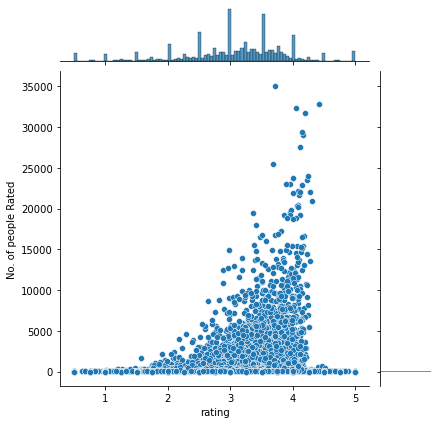

In [65]:
sns.jointplot(x=rating_data['rating'],y=rating_data['No. of people Rated']);

This clearly shows that the Movies with ratings in the range of 3 to 4.5 has the most number of ratings. Movies with almost 5 star ratings has around 100 or 200 number of ratings to it. Lets just plot a Densityplot to have a look at the dense regions.

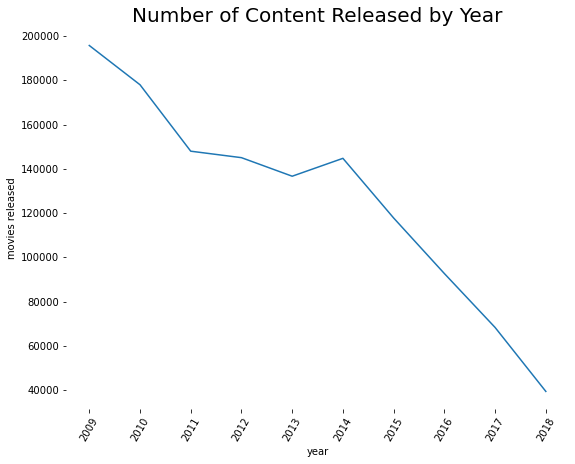

In [76]:
release = df_movie_R['year'].value_counts()
release = release.sort_index(ascending=True)

plt.figure(figsize=(9,7))
plt.plot(release[-11:-1])
#plt.scatter(release[-11:-1].index, release[-11:-1].values, s=0.5*release[-11:-1].values, c='Red');
plt.box(on=None);
plt.xticks(rotation = 60)
plt.xticks(release[-11:-1].index);
plt.title('Number of Content Released by Year', fontsize=20)
plt.xlabel('year')
plt.ylabel('movies released');

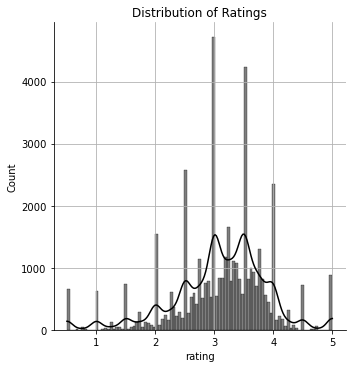

In [60]:
# lets check the Distribution of Ratings across the Movies

sns.displot(x=rating_data['rating'], color = 'black',kde=True,height=5)
plt.title('Distribution of Ratings')
plt.grid()

The graph is bell shaped which means that the rating data is **normally distributed

## Link data

Now lets look at the title and genre features we will plot word clouds to show most frequent words 

In [21]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [22]:
df_links.shape

(62423, 3)

In [ ]:
def fetch_poster(movie_id):
    """generate poster link based on id"""
    try:
        url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US"
        data_link = requests.get(url)
        data_link = data_link.json()
        poster_path = data_link['poster_path']
        base_poster_url = "https://image.tmdb.org/t/p/w500/" + poster_path
        return base_poster_url
    except :
        return "https://i5.walmartimages.com/asr/4add4de6-7b92-4846-8316-b7a0cbec4dc7_1.8e2f7305081b9284e56d112fe146dc90.png"


In [ ]:
# the following codes takes time to run, the results has been saved as Links_2.csv
#links["images"] = links["tmdbId"].apply(fetch_poster)

In [ ]:
def get_links(string):
    length = len(str(string))
    return "https://www.imdb.com/title/tt"+"0"*(7 - length)+str(string)+"/"

In [ ]:
#df_links["link"] = df_links["imdbId"].apply(get_links)

In [ ]:
#df_links.to_csv('Links2.csv', index=False)

In [25]:
df_link2 = pd.read_csv("Links2.csv")

In [26]:
df_link2.head()

,Unnamed: 0,movieId,imdbId,tmdbId,link,images
0,0,1,114709,862.0,https://www.imdb.com/title/tt0114709/,https://image.tmdb.org/t/p/w500//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg
1,1,2,113497,8844.0,https://www.imdb.com/title/tt0113497/,https://image.tmdb.org/t/p/w500//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg
2,2,3,113228,15602.0,https://www.imdb.com/title/tt0113228/,https://image.tmdb.org/t/p/w500//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg
3,3,4,114885,31357.0,https://www.imdb.com/title/tt0114885/,https://image.tmdb.org/t/p/w500//4uw6HKq4vlhrSVp0zkgd4zCy4Pf.jpg
4,4,5,113041,11862.0,https://www.imdb.com/title/tt0113041/,https://image.tmdb.org/t/p/w500//rj4LBtwQ0uGrpBnCELr716Qo3mw.jpg


In [27]:
df_link2['images'] = "<img src='" + df_link2['images'] + "' style='height:100px;'>"

In [28]:
df_link2 = df_link2.drop('Unnamed: 0',axis=1)

In [29]:
df_link2.head()

,movieId,imdbId,tmdbId,link,images
0,1,114709,862.0,https://www.imdb.com/title/tt0114709/,<img src='https://image.tmdb.org/t/p/w500//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>
1,2,113497,8844.0,https://www.imdb.com/title/tt0113497/,<img src='https://image.tmdb.org/t/p/w500//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>
2,3,113228,15602.0,https://www.imdb.com/title/tt0113228/,<img src='https://image.tmdb.org/t/p/w500//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>
3,4,114885,31357.0,https://www.imdb.com/title/tt0114885/,<img src='https://image.tmdb.org/t/p/w500//4uw6HKq4vlhrSVp0zkgd4zCy4Pf.jpg' style='height:100px;'>
4,5,113041,11862.0,https://www.imdb.com/title/tt0113041/,<img src='https://image.tmdb.org/t/p/w500//rj4LBtwQ0uGrpBnCELr716Qo3mw.jpg' style='height:100px;'>


In [31]:
df_combined = pd.merge(df_movie_R,df_link2,on='movieId', how = 'inner')

In [32]:
df_combined.head()

,movieId,userId,title,genres,rating,year,imdbId,tmdbId,link,images
0,1,158849,Toy Story,adventure animation child comedy fantasy,5.0,1995,114709,862.0,https://www.imdb.com/title/tt0114709/,<img src='https://image.tmdb.org/t/p/w500//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>
1,1,97203,Toy Story,adventure animation child comedy fantasy,5.0,1995,114709,862.0,https://www.imdb.com/title/tt0114709/,<img src='https://image.tmdb.org/t/p/w500//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>
2,1,161871,Toy Story,adventure animation child comedy fantasy,3.0,1995,114709,862.0,https://www.imdb.com/title/tt0114709/,<img src='https://image.tmdb.org/t/p/w500//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>
3,1,45117,Toy Story,adventure animation child comedy fantasy,4.0,1995,114709,862.0,https://www.imdb.com/title/tt0114709/,<img src='https://image.tmdb.org/t/p/w500//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>
4,1,27431,Toy Story,adventure animation child comedy fantasy,5.0,1995,114709,862.0,https://www.imdb.com/title/tt0114709/,<img src='https://image.tmdb.org/t/p/w500//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>


In [33]:
movies_by_year = df_combined[['movieId','images', 'title', 'genres', 'rating', 'year']].head(10)
pd.set_option('display.max_colwidth', 100)
HTML(movies_by_year.to_html(escape=False))

,movieId,images,title,genres,rating,year
0,1,,Toy Story,adventure animation child comedy fantasy,5.0,1995
1,1,,Toy Story,adventure animation child comedy fantasy,5.0,1995
2,1,,Toy Story,adventure animation child comedy fantasy,3.0,1995
3,1,,Toy Story,adventure animation child comedy fantasy,4.0,1995
4,1,,Toy Story,adventure animation child comedy fantasy,5.0,1995
5,1,,Toy Story,adventure animation child comedy fantasy,4.0,1995
6,1,,Toy Story,adventure animation child comedy fantasy,4.5,1995
7,1,,Toy Story,adventure animation child comedy fantasy,4.0,1995
8,1,,Toy Story,adventure animation child comedy fantasy,3.0,1995
9,1,,Toy Story,adventure animation child comedy fantasy,3.5,1995


## imdb data

In [47]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morr...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan G...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Margret|Burgess Meredith|Daryl Hannah|Kevin Pollak|K...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Mykelti ...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betrayal|mother son relationship
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [48]:
df_imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [49]:
df_imdb.dropna(inplace=True)

In [71]:
df_imdb['runtime'].unique()

array([ 81., 104., 101., 124., 106., 170., 127., 111., 130., 114.,  88.,
       192., 178., 136.,  98.,  90., 110., 105., 123., 132., 112.,  99.,
       129.,  91., 122.,  97., 119., 117.,  95., 100., 103., 108.,  96.,
       143.,  89.,  93., 118.,  85., 115., 102., 116.,  92., 135., 140.,
       139., 121.,  83., 128., 109., 134.,  94., 145., 113., 107.,  78.,
       133., 154., 159., 142.,  86., 141., 125., 191., 120.,  87., 144.,
       171., 138., 195., 131.,  76.,  80., 160.,  82., 137.,  84.,  79.,
       149., 147., 162.,  71., 158., 126., 242.,  75., 150., 155., 194.,
       177., 169., 151.,  69.,  73., 172.,  77., 157., 189., 148., 188.,
       146., 202., 156., 165., 180., 271., 183.,  53., 152.,  72., 161.,
       179., 167.,  70., 219., 224., 201., 185.,  74., 163., 594., 235.,
       292.,  63., 175., 361.,  60., 182., 257., 240., 417., 210., 181.,
        65.,  23., 153., 359., 352., 168.,  45., 187.,  20., 164.,  64.,
       255., 176.,  18.,   6., 213., 174.,  27., 27

In [74]:
runtimes = []

for runtime in df_imdb['runtime']:
    if runtime < 50:
        runtimes.append('Short')
    elif runtime < 80:
        runtimes.append('Below minimum')
    elif runtime < 180:
        runtimes.append('Feature-length')
    elif runtime < 300:
        runtimes.append('Long')
    elif runtime >= 300:
        runtimes.append('VLMS')
    else:
        runtimes.append('No Info')
        
df_imdb['feature_length'] = runtimes

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Feature-length'),
  Text(1, 0, 'Long'),
  Text(2, 0, 'Below minimum'),
  Text(3, 0, 'VLMS'),
  Text(4, 0, 'Short')])

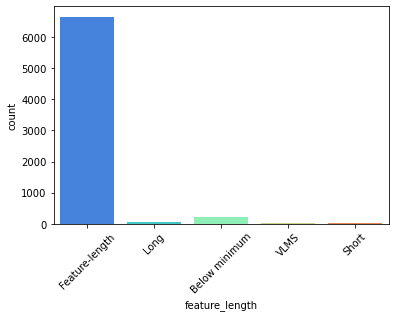

In [75]:
sns.countplot(df_imdb['feature_length'], palette='rainbow')
plt.xticks(rotation=45)

Text(0.5, 0, 'Runtime in Minutes')

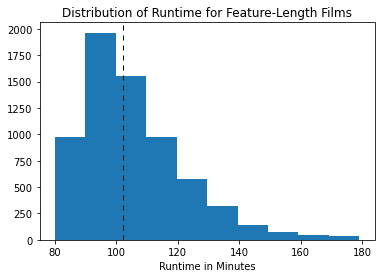

In [76]:
feature_length = df_imdb[df_imdb['feature_length'] == 'Feature-length']

plt.hist(feature_length['runtime'])
plt.axvline((feature_length['runtime'].median()), color='k', dashes=[5,5] , linewidth=1) #Create reference line
plt.title('Distribution of Runtime for Feature-Length Films')
plt.xlabel('Runtime in Minutes')

In [82]:
df_imdb['title_cast'].unique()

array(['TomHanks TimAllen DonRickles JimVarney WallaceShawn JohnRatzenberger AnniePotts JohnMorris ErikvonDetten LaurieMetcalf R.LeeErmey SarahFreeman PennJillette JackAngel SpencerAste',
       'RobinWilliams JonathanHyde KirstenDunst BradleyPierce BonnieHunt BebeNeuwirth DavidAlanGrier PatriciaClarkson AdamHann-Byrd LauraBellBundy JamesHandy GillianBarber BrandonObray CyrusThiedeke GaryJosephThorup',
       'WalterMatthau JackLemmon SophiaLoren Ann-Margret BurgessMeredith DarylHannah KevinPollak KatieSagona AnnMorganGuilbert JamesAndelin MarcusKlemp MaxWright CherylHawker WayneA.Evenson AllisonLevine',
       ...,
       'NikolajCoster-Waldau UlrichThomsen NikolajLieKaas RolandMøller ThomasBoLarsen MariaBonnevie EwaFröling PeterHaber MollyBlixtEgelind MayAndersen ClausRiisØstergaard BodilJørgensen OleDupont CharlotteFich SarahJuelWerner',
       'KonstantinGraudus GustavAdolphArtz JürgenKittel SönkeKorries ErikRoßbander TillHuster DieterDost MichaelSombetzki ClarissaSchröter JürgenKo

In [81]:
df_imdb['title_cast'] = df_imdb['title_cast'].str.replace(r"\(.*\)","")

# Clean so that writers are one word for later NLP
df_imdb['title_cast'] =df_imdb['title_cast'].apply(lambda x: str(x).replace(" ",""))
df_imdb['title_cast'] = df_imdb['title_cast'].apply(lambda x: str(x).replace ("|", " "))

df_imdb['title_cast'] = df_imdb['title_cast'].apply(lambda x: str(x))

In [95]:
df_imdb['title_cast'] = df_imdb['title_cast'].apply(lambda x: str(x).lower())
casts = df_imdb['title_cast']

text = ' '.join(casts) 


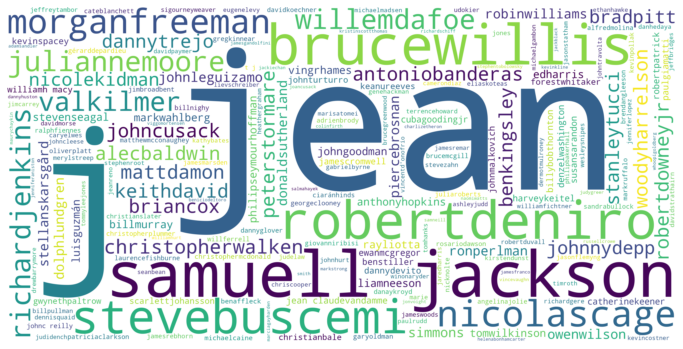

In [96]:
word = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(text)

plt.figure(figsize=(12,7))
plt.imshow(word, interpolation='bilinear')
plt.axis("off")
plt.show()

<a id="four"></a>

# **4. Data Engineering**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|  *Description: Data engineering*  |
| :--------------------------- |
| 
>In this section the dataset will be cleaned and possible new new features created - as identified in the EDA phase. |

---


<a id="five"></a>

# **5. Modelling**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| *Description: Modelling*  |
| :--------------------------- |
| 
>In this section models will be built,namley: . |

---

<a id="six"></a>

# **6.Model Performance**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| *Description: Model performance* |
| :--------------------------- |
| 
>In this section the models that were built will be compared relative to their performance and the best model will be selected. |

---

<a id="seven"></a>

# **7. Model Explanation**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|  *Description: Model explanation*  |
| :--------------------------- |
| 
>A brief explanation is given of which model preformed the best
---

![](https://imageio.forbes.com/specials-images/dam/imageserve/966248982/660x0.jpg?format=jpg&width=960)